**Rationale** In this assignment, you will practice specifying, running, and interpreting regressions involving non-linear functional forms and heterogeneous effects. You will be using the datasets located in your Datasets folder.

1. Avocado dataset
1. Starbucks campaign data

Helpful reference:
https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/


In [ ]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
fpath = '/content/drive/MyDrive/Colab Notebooks/' # change to your data folder
os.listdir(fpath)

['Assignment 1',
 'Assignment2Dotsenko"A2 - programming fundamentals.ipynb"',
 '.ipynb_checkpoints',
 'quebec_biz.csv',
 'quebec_yelp_reviews.csv',
 'filtered_quebec_yelp_reviews.csv',
 'facebook_ads.csv',
 'starbucks_promos.csv',
 'Копия блокнота "A3_Yelp_Reviews.ipynb"',
 'Копия блокнота "A4 Stats Review.ipynb"',
 'avocado.csv']

# Problem 1 (50 points) Avocado prices

**Only use data for conventional types and remove the data for the region TotalUS**

First, write a loop through each unique region to plot the
1. Total Volume vs. Average Price
1. Total Volume vs. ln(Average Price)
1. ln(Total Volume) vs. Average Price
1. ln(Total Volume) vs. ln(Average Price)

For each of the above 4 plots, the syntax should look something like:
```
for r in df.region.unique():
    temp = df[df.region==r]
    plt.scatter(....) # fill this in
```

1. Which of the plots of the relationship between price and demand looks most "linear?"


In [ ]:
# read in the dataset and replace column name spaces with underscores
avocado = pd.read_csv(fpath + 'avocado.csv', index_col = 0)
avocado.columns = [c.replace(' ', '_') for c in avocado.columns]

In [ ]:
# select regions that are not TotalUS e.g. region != 'TotalUS' and only conventional types
avocado = avocado.loc[(avocado.region != 'TotalUS')&(avocado.type== 'conventional')]


In [ ]:
# check the unique regions to make sure TotalUS is not in the region column
avocado_filtered = avocado[(avocado.type == 'conventional') & (avocado.region != 'TotalUS')]


In [ ]:
# check the unique types to make sure there are only conventional types
unique_regions = avocado_filtered.region.unique()


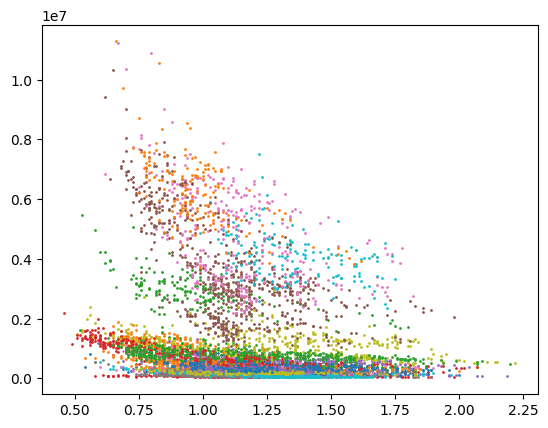

In [ ]:
# write a loop to plot total volume vs average price (e.g. Y vs. X) and color each region differently
# e.g.:
# for r in avocado.region.unique():
#     temp = avocado.loc[avocado.region == r]
#     plt.scatter( X , Y, s= 1) # <- change this, make sure average price is on the x-axis

for r in avocado.region.unique():
    temp = avocado.loc[avocado.region == r]
    plt.scatter(temp.AveragePrice, temp.Total_Volume, s= 1)


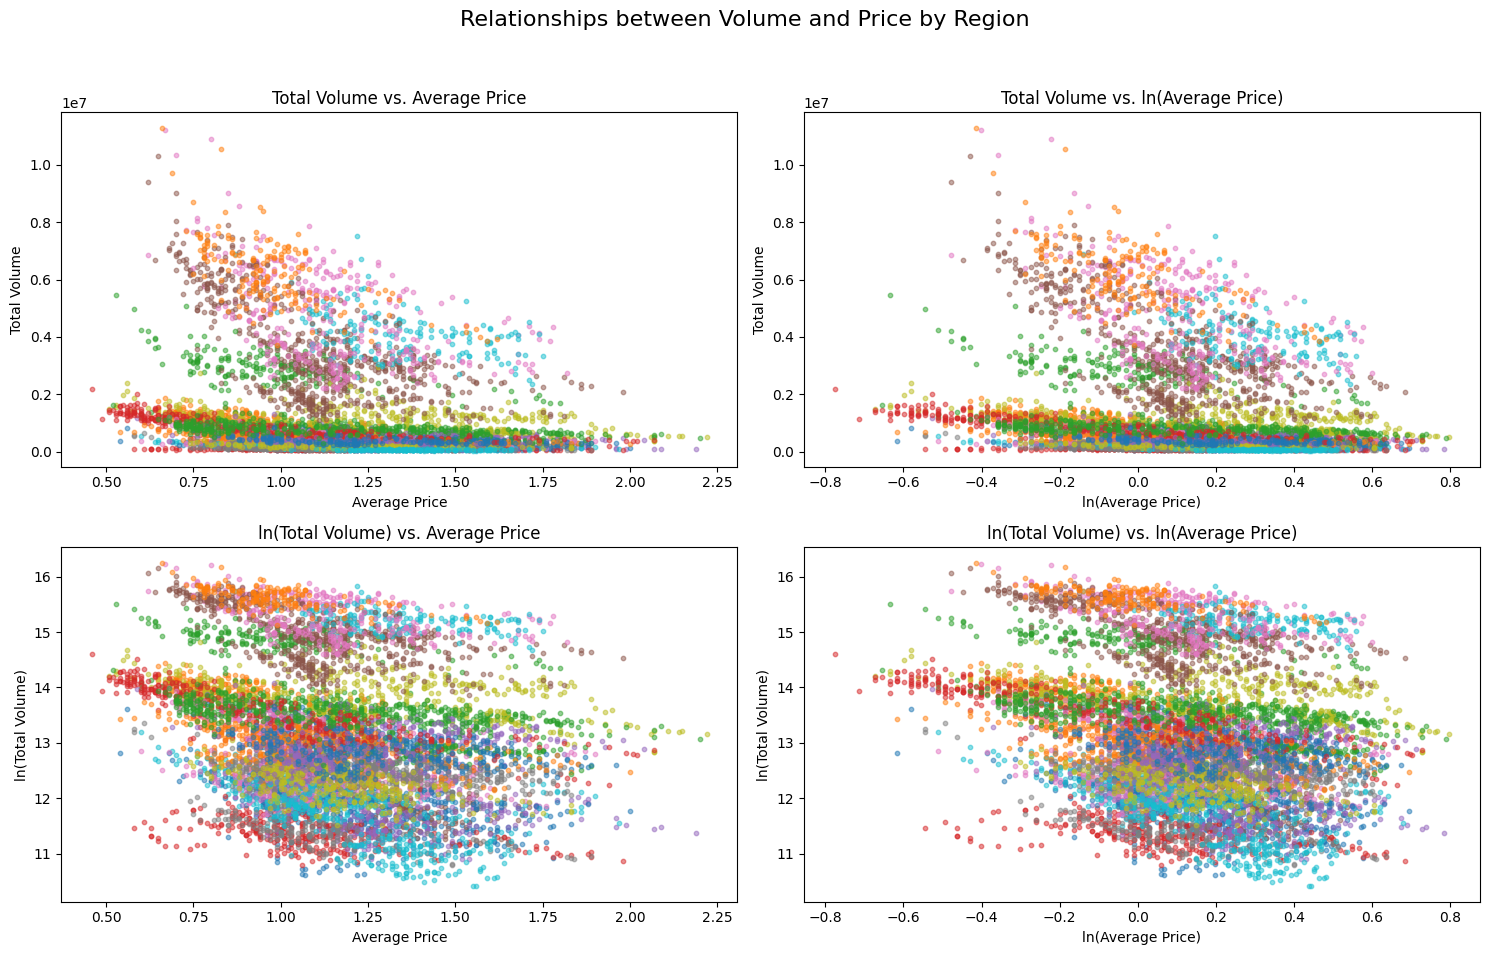

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Relationships between Volume and Price by Region', fontsize=16)

for r in unique_regions:
    temp = avocado_filtered[avocado_filtered.region == r]
    axs[0, 0].scatter(temp.AveragePrice, temp.Total_Volume, s=10, alpha=0.5)
    axs[0, 1].scatter(np.log(temp.AveragePrice), temp.Total_Volume, s=10, alpha=0.5)
    axs[1, 0].scatter(temp.AveragePrice, np.log(temp.Total_Volume), s=10, alpha=0.5)
    axs[1, 1].scatter(np.log(temp.AveragePrice), np.log(temp.Total_Volume), s=10, alpha=0.5)

axs[0, 0].set_title('Total Volume vs. Average Price')
axs[0, 0].set_xlabel('Average Price')
axs[0, 0].set_ylabel('Total Volume')

axs[0, 1].set_title('Total Volume vs. ln(Average Price)')
axs[0, 1].set_xlabel('ln(Average Price)')
axs[0, 1].set_ylabel('Total Volume')

axs[1, 0].set_title('ln(Total Volume) vs. Average Price')
axs[1, 0].set_xlabel('Average Price')
axs[1, 0].set_ylabel('ln(Total Volume)')

axs[1, 1].set_title('ln(Total Volume) vs. ln(Average Price)')
axs[1, 1].set_xlabel('ln(Average Price)')
axs[1, 1].set_ylabel('ln(Total Volume)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



**EDIT THIS CELL**

Which plot seems to exhibit the most linear relationship within each region? (i.e. dots of the same color seem to form closest to a straight line).

The plot that seems to exhibit the most linear relationship, is the **ln(Total Volume)** vs. **ln(Average Price)** plot. This suggests that the **log-log** model may be most appropriate.

(*models can be level-level, log-log, level-log, log-level.*)


## Regression Model
Using the avocado dataset, estimate the following demand models while accounting for the region effects (incl region in the regression):

1. level - level
1. log - level
1. level - log
1. log - log

Answer the following:
1. Succinctly interpret the **price coefficient** for each model (pay attention to corresponding p-values as well).


**Review:** To summarize the various log transformations.

|Model| Dept. Var. | Expl. Var. | Approx. Interpretation | Exact interpretation|
|---|---|---|---|---|
|**level-log** $$y=\beta_0+\beta_1ln(x)+e$$ | $y$ | $ln(x)$ | $$\Delta y = \frac{\beta_1}{100}\%\Delta x$$ | $$\Delta y = \beta_1 ln(\frac{100+\%\Delta X}{100})$$|
|**log-level** $$ln(y)=\beta_0+\beta_1x+e$$ | $ln(y)$ | x |$$\%\Delta y = 100\cdot\beta_1\Delta x$$ | $$\%\Delta y = 100\cdot (e^{\beta_1}-1)\Delta x$$ |
|**log-log** $$ln(y)=\beta_0+\beta_1ln(x)+e$$ | $ln(y)$ | $ln(x)$ | $$\%\Delta y = \beta_1\%\Delta x$$ | $$\bigg(\big(1+\% \Delta x/100\big)^{\beta_1}-1\bigg)\times 100 $$|

The approximate interpretations are roughly accurate for small changes in $x$, particularly if the magnitude of $\beta_1$ is small (whether positive or negative).


If you've forgotten what logarithms are from algebra/precalc, please [review](https://www.youtube.com/watch?v=_divhRCjVok).


In [ ]:
# run the level-level regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.
# print the regression table below

avocado_filtered['ln_AveragePrice'] = np.log(avocado_filtered.AveragePrice)
avocado_filtered['ln_Total_Volume'] = np.log(avocado_filtered.Total_Volume)

level_level_model = smf.ols('Total_Volume ~ AveragePrice + C(region)', data=avocado_filtered).fit()

level_level_summary = level_level_model.summary()

level_level_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Volume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3232.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:13:08   Log-Likelihood:            -1.2705e+05
No. Observations:                8957   AIC:                         2.542e+05
Df Residuals:                    8903   BIC:                         2.546e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         8.707e+05   3.61e+04     24.128      0.000       8e+05    9.41e+05
C(region)[T.Atlanta]              2.584e+05   3.85e+04      6.714      0.000    1.83e+05    3.34e+05
C(region)[T.BaltimoreWashington]  6.781e+05   3.82e+04     17.764      0.000    6.03e+05    7.53e+05
C(region)[T.Boise]               -1.673e+05   3.85e+04     -4.349      0.000   -2.43e+05   -9.19e+04
C(region)[T.Boston]                4.43e+05   3.82e+04     11.604      0.000    3.68e+05    5.18e+05
C(region)[T.BuffaloRochester]     5.685e+04   3.82e+04      1.489      0.136    -1.8e+04    1.32e+05
C(region)[T.California]           5.705e+06   3.84e+04    148.511      0.000    5.63e+06    5.78e+06
C(region)[T.Charlotte]            6.794e+04   3.82e+04      1.779      0.075   -6927.768    1.43e+05
C(region)[T.Chicago]              6.788e+05   3.82e+04     17.781      0.000    6.04e+05    7.54e+05
C(region)[T.CincinnatiDayton]    -3.726e+04   3.86e+04     -0.964      0.335   -1.13e+05    3.85e+04
C(region)[T.Columbus]            -8.654e+04   3.85e+04     -2.248      0.025   -1.62e+05   -1.11e+04
C(region)[T.DallasFtWorth]        8.299e+05   3.92e+04     21.170      0.000    7.53e+05    9.07e+05
C(region)[T.Denver]               5.345e+05   3.85e+04     13.890      0.000    4.59e+05     6.1e+05
C(region)[T.Detroit]              1.369e+05   3.84e+04      3.567      0.000    6.17e+04    2.12e+05
C(region)[T.GrandRapids]          6.879e+04   3.82e+04      1.802      0.072   -6045.467    1.44e+05
C(region)[T.GreatLakes]           3.169e+06   3.83e+04     82.776      0.000    3.09e+06    3.24e+06
C(region)[T.HarrisburgScranton]   9.375e+04   3.82e+04      2.454      0.014    1.89e+04    1.69e+05
C(region)[T.HartfordSpringfield]  2.316e+05   3.82e+04      6.065      0.000    1.57e+05    3.06e+05
C(region)[T.Houston]              7.838e+05   3.93e+04     19.950      0.000    7.07e+05    8.61e+05
C(region)[T.Indianapolis]        -3.622e+04   3.83e+04     -0.945      0.345   -1.11e+05    3.89e+04
C(region)[T.Jacksonville]        -1.512e+04   3.83e+04     -0.395      0.693   -9.01e+04    5.99e+04
C(region)[T.LasVegas]             2.565e+04   3.86e+04      0.664      0.507   -5.01e+04    1.01e+05
C(region)[T.LosAngeles]           2.618e+06   3.87e+04     67.590      0.000    2.54e+06    2.69e+06
C(region)[T.Louisville]           -1.41e+05   3.84e+04     -3.669      0.000   -2.16e+05   -6.56e+04
C(region)[T.MiamiFtLauderdale]    4.267e+05   3.82e+04     11.166      0.000    3.52e+05    5.02e+05
C(region)[T.Midsouth]             2.727e+06   3.83e+04     71.285      0.000    2.65e+06     2.8e+06
C(region)[T.Nashville]           -8.397e+04   3.86e+04     -2.173      0.030    -1.6e+05   -8233.353
C(region)[T.NewOrleansMobile]     2.181e+04   3.85e+0

**Edit this cell**

For the level-level regression, explain the coefficient for the price variable:

1. Answer here:

In [ ]:
# run the log-level regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.
# print the regression table below

log_level_model = smf.ols('ln_Total_Volume ~ AveragePrice + C(region)', data=avocado_filtered).fit()
log_level_summary = log_level_model.summary()
log_level_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_Total_Volume   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     6552.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:13:09   Log-Likelihood:                 2047.2
No. Observations:                8957   AIC:                            -3986.
Df Residuals:                    8903   BIC:                            -3603.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           12.1701      0.020    612.758      0.000      12.131      12.209
C(region)[T.Atlanta]                 1.5741      0.021     74.299      0.000       1.533       1.616
C(region)[T.BaltimoreWashington]     2.1526      0.021    102.463      0.000       2.111       2.194
C(region)[T.Boise]                  -0.2486      0.021    -11.741      0.000      -0.290      -0.207
C(region)[T.Boston]                  1.8056      0.021     85.929      0.000       1.764       1.847
C(region)[T.BuffaloRochester]        0.3783      0.021     18.004      0.000       0.337       0.419
C(region)[T.California]              4.0485      0.021    191.488      0.000       4.007       4.090
C(region)[T.Charlotte]               0.7698      0.021     36.619      0.000       0.729       0.811
C(region)[T.Chicago]                 2.1401      0.021    101.867      0.000       2.099       2.181
C(region)[T.CincinnatiDayton]        0.8165      0.021     38.408      0.000       0.775       0.858
C(region)[T.Columbus]                0.4566      0.021     21.549      0.000       0.415       0.498
C(region)[T.DallasFtWorth]           2.3154      0.022    107.324      0.000       2.273       2.358
C(region)[T.Denver]                  2.0047      0.021     94.657      0.000       1.963       2.046
C(region)[T.Detroit]                 1.2354      0.021     58.485      0.000       1.194       1.277
C(region)[T.GrandRapids]             0.6192      0.021     29.475      0.000       0.578       0.660
C(region)[T.GreatLakes]              3.5204      0.021    167.070      0.000       3.479       3.562
C(region)[T.HarrisburgScranton]      0.9253      0.021     44.007      0.000       0.884       0.967
C(region)[T.HartfordSpringfield]     1.2018      0.021     57.184      0.000       1.161       1.243
C(region)[T.Houston]                 2.2664      0.022    104.817      0.000       2.224       2.309
C(region)[T.Indianapolis]            0.5378      0.021     25.485      0.000       0.496       0.579
C(region)[T.Jacksonville]            0.5027      0.021     23.868      0.000       0.461       0.544
C(region)[T.LasVegas]                1.0449      0.021     49.140      0.000       1.003       1.087
C(region)[T.LosAngeles]              3.2630      0.021    153.041      0.000       3.221       3.305
C(region)[T.Louisville]             -0.1233      0.021     -5.830      0.000      -0.165      -0.082
C(region)[T.MiamiFtLauderdale]       1.7724      0.021     84.284      0.000       1.731       1.814
C(region)[T.Midsouth]                3.3930      0.021    161.159      0.000       3.352       3.434
C(region)[T.Nashville]               0.6027      0.021     28.346      0.000       0.561       0.644
C(region)[T.NewOrleansMobile]        0.9266      0.02

**Edit this cell**

For the log-level regression, explain the coefficient for the price variable:

1. Answer here:



In [ ]:
# run the level-log regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.
# print the regression table below

level_log_model = smf.ols('Total_Volume ~ ln_AveragePrice + C(region)', data=avocado_filtered).fit()
level_log_summary = level_log_model.summary()
level_log_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Volume   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3308.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:13:09   Log-Likelihood:            -1.2695e+05
No. Observations:                8957   AIC:                         2.540e+05
Df Residuals:                    8903   BIC:                         2.544e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         3.072e+05   2.74e+04     11.228      0.000    2.54e+05    3.61e+05
C(region)[T.Atlanta]              2.454e+05   3.81e+04      6.447      0.000    1.71e+05     3.2e+05
C(region)[T.BaltimoreWashington]  6.784e+05   3.78e+04     17.969      0.000    6.04e+05    7.52e+05
C(region)[T.Boise]               -1.886e+05   3.81e+04     -4.952      0.000   -2.63e+05   -1.14e+05
C(region)[T.Boston]               4.428e+05   3.78e+04     11.727      0.000    3.69e+05    5.17e+05
C(region)[T.BuffaloRochester]     6.139e+04   3.78e+04      1.626      0.104   -1.26e+04    1.35e+05
C(region)[T.California]           5.691e+06    3.8e+04    149.773      0.000    5.62e+06    5.77e+06
C(region)[T.Charlotte]            6.891e+04   3.78e+04      1.825      0.068   -5126.720    1.43e+05
C(region)[T.Chicago]              6.678e+05   3.78e+04     17.688      0.000    5.94e+05    7.42e+05
C(region)[T.CincinnatiDayton]     -6.46e+04   3.83e+04     -1.689      0.091    -1.4e+05    1.04e+04
C(region)[T.Columbus]            -1.011e+05   3.81e+04     -2.654      0.008   -1.76e+05   -2.64e+04
C(region)[T.DallasFtWorth]        7.717e+05    3.9e+04     19.793      0.000    6.95e+05    8.48e+05
C(region)[T.Denver]               5.191e+05   3.81e+04     13.638      0.000    4.45e+05    5.94e+05
C(region)[T.Detroit]              1.265e+05    3.8e+04      3.332      0.001    5.21e+04    2.01e+05
C(region)[T.GrandRapids]          5.765e+04   3.78e+04      1.527      0.127   -1.64e+04    1.32e+05
C(region)[T.GreatLakes]           3.165e+06   3.79e+04     83.604      0.000    3.09e+06    3.24e+06
C(region)[T.HarrisburgScranton]   9.798e+04   3.78e+04      2.594      0.010    2.39e+04    1.72e+05
C(region)[T.HartfordSpringfield]  2.301e+05   3.78e+04      6.093      0.000    1.56e+05    3.04e+05
C(region)[T.Houston]              7.161e+05   3.91e+04     18.292      0.000    6.39e+05    7.93e+05
C(region)[T.Indianapolis]        -4.363e+04   3.79e+04     -1.151      0.250   -1.18e+05    3.07e+04
C(region)[T.Jacksonville]        -2.363e+04   3.79e+04     -0.624      0.532   -9.78e+04    5.06e+04
C(region)[T.LasVegas]             3991.8179   3.82e+04      0.104      0.917    -7.1e+04    7.89e+04
C(region)[T.LosAngeles]            2.58e+06   3.84e+04     67.181      0.000    2.51e+06    2.66e+06
C(region)[T.Louisville]          -1.523e+05    3.8e+04     -4.009      0.000   -2.27e+05   -7.78e+04
C(region)[T.MiamiFtLauderdale]    4.212e+05   3.78e+04     11.145      0.000    3.47e+05    4.95e+05
C(region)[T.Midsouth]             2.729e+06   3.78e+04     72.163      0.000    2.66e+06     2.8e+06
C(region)[T.Nashville]           -1.047e+05   3.82e+04     -2.740      0.006    -1.8e+05   -2.98e+04
C(region)[T.NewOrleansMobile]     7022.8376    3.8e+0

**Edit this cell**

For the level-log regression, explain the coefficient for the price variable:

1. Answer here:

In [ ]:
# run the log-log regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.
# print the regression table below

log_log_model = smf.ols('ln_Total_Volume ~ ln_AveragePrice + C(region)', data=avocado_filtered).fit()
log_log_summary = log_log_model.summary()
log_log_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_Total_Volume   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     6817.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:13:09   Log-Likelihood:                 2220.8
No. Observations:                8957   AIC:                            -4334.
Df Residuals:                    8903   BIC:                            -3950.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           11.5966      0.015    776.570      0.000      11.567      11.626
C(region)[T.Atlanta]                 1.5676      0.021     75.451      0.000       1.527       1.608
C(region)[T.BaltimoreWashington]     2.1529      0.021    104.485      0.000       2.113       2.193
C(region)[T.Boise]                  -0.2632      0.021    -12.663      0.000      -0.304      -0.222
C(region)[T.Boston]                  1.8063      0.021     87.650      0.000       1.766       1.847
C(region)[T.BuffaloRochester]        0.3819      0.021     18.532      0.000       0.342       0.422
C(region)[T.California]              4.0404      0.021    194.821      0.000       4.000       4.081
C(region)[T.Charlotte]               0.7723      0.021     37.463      0.000       0.732       0.813
C(region)[T.Chicago]                 2.1291      0.021    103.328      0.000       2.089       2.169
C(region)[T.CincinnatiDayton]        0.7974      0.021     38.196      0.000       0.756       0.838
C(region)[T.Columbus]                0.4487      0.021     21.591      0.000       0.408       0.489
C(region)[T.DallasFtWorth]           2.2702      0.021    106.687      0.000       2.228       2.312
C(region)[T.Denver]                  1.9959      0.021     96.069      0.000       1.955       2.037
C(region)[T.Detroit]                 1.2302      0.021     59.384      0.000       1.190       1.271
C(region)[T.GrandRapids]             0.6090      0.021     29.552      0.000       0.569       0.649
C(region)[T.GreatLakes]              3.5200      0.021    170.363      0.000       3.480       3.561
C(region)[T.HarrisburgScranton]      0.9314      0.021     45.173      0.000       0.891       0.972
C(region)[T.HartfordSpringfield]     1.1991      0.021     58.175      0.000       1.159       1.239
C(region)[T.Houston]                 2.2124      0.021    103.553      0.000       2.171       2.254
C(region)[T.Indianapolis]            0.5351      0.021     25.858      0.000       0.495       0.576
C(region)[T.Jacksonville]            0.4979      0.021     24.100      0.000       0.457       0.538
C(region)[T.LasVegas]                1.0313      0.021     49.424      0.000       0.990       1.072
C(region)[T.LosAngeles]              3.2344      0.021    154.288      0.000       3.193       3.275
C(region)[T.Louisville]             -0.1289      0.021     -6.218      0.000      -0.170      -0.088
C(region)[T.MiamiFtLauderdale]       1.7691      0.021     85.775      0.000       1.729       1.810
C(region)[T.Midsouth]                3.3981      0.021    164.633      0.000       3.358       3.439
C(region)[T.Nashville]               0.5900      0.021     28.278      0.000       0.549       0.631
C(region)[T.NewOrleansMobile]        0.9181      0.02

**Edit this cell**

For the log-log regression, explain the meaning of the coefficient for the price variable:

1. Answer here:

In the log-log regression model, the coefficient for the price variable represents the elasticity of demand with respect to price. Specifically, it measures the percentage change in the total volume of avocados sold for a 1% change in average price. Since the coefficient is negative, it indicates that the relationship between price and total volume is inversely proportional: as the price of avocados increases, the total volume sold decreases, and vice versa. This negative coefficient is consistent with the law of demand, which states that consumers will buy less of a good as its price rises.


# Problem 2 (50 points)

Use the Starbucks promotions data. Filter the data to use only the rows satisfying all of the following conditions:

1. Transaction amount more than 0 and less than 50.
1. Income is not missing (df.income.notnull())

We suspect the average transaction value might be higher for individuals with higher incomes. We also suspect that the higher the offer difficulty (min. amount spend needed to redeem), the higher the spend. However, this effect might be different depending on income. Additionally, the offer type (buy one get one vs. discount) may impact the transaction amount. Moreover, this effect of the offer type may differ depending on income.

1. To capture all of these potential effects, run the following regression:
$$
ln(\text{Trans Amt}) = \beta_0 + \beta_1 ln(\text{Inc}) + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer} + \beta_4 ln(\text{Inc})\times \text{difficulty} + \beta_5  ln(\text{Inc})\times \text{Disc Offer}+ e
$$

1. Succinctly interpret the regression results.

**Edit this cell**

Demonstrate your understanding of interpretating regressions here by filling the blanks in the statements below:

1. In terms of the $\beta's$ in the equation above, 1% increase in income when a discount offer is made and qualification difficulty is \$10 leads to approximately 1.3133% change in transaction amount.
1. In terms of the $\beta's$ in the equation above, 1% increase in income when a BOGO offer is made and qualification difficulty is \$5 leads to approximately 0.9995% change in transaction amount.

**Remember** the solution here is not as simple as looking at a single coefficient. The effect of income depends on offer type and difficulty.

Note, you can re-write the equation as:
$$
ln(\text{Trans Amt}) = \beta_0  + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer}  + \big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big] \times ln(\text{Inc})+ e
$$

Where the entire effect of $ln(income)$ on $ln(TransactionAmount)$ is captured by the expression $\big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big]$.

In [ ]:
sb = pd.read_csv(fpath + 'starbucks_promos.csv', index_col=0) # read the starbucks data

In [ ]:
# select rows with transactions >0 but <50 and income is not missing
# replace sb with the result of the selection

starbucks_filtered = sb[(sb.transaction_amount > 0) &
                        (sb.transaction_amount < 50) &
                        sb.income.notnull()].copy()

starbucks_filtered.loc[:, 'ln_Trans_Amt'] = np.log(starbucks_filtered.transaction_amount)
starbucks_filtered.loc[:, 'ln_Inc'] = np.log(starbucks_filtered.income)
starbucks_filtered.loc[:, 'Disc_Offer'] = (starbucks_filtered.offer_type == 'discount').astype(int)


In [ ]:
# run the regression here, store the result as the variable res

sb_regression_model = smf.ols(
    'ln_Trans_Amt ~ ln_Inc + difficulty + Disc_Offer + ln_Inc:difficulty + ln_Inc:Disc_Offer',
    data=starbucks_filtered
).fit()



In [ ]:
# print the result summary here, e.g. print(res.summary()):

sb_regression_summary = sb_regression_model.summary()
sb_regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ln_Trans_Amt   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     4243.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:13:10   Log-Likelihood:                -21161.
No. Observations:               30695   AIC:                         4.233e+04
Df Residuals:                   30689   BIC:                         4.238e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -10.2574      0.223    -46.001      0.000     -10.694      -9.820
ln_Inc                1.1575      0.020     57.619      0.000       1.118       1.197
difficulty            0.3752      0.025     15.066      0.000       0.326       0.424
Disc_Offer           -5.4467      0.210    -25.948      0.000      -5.858      -5.035
ln_Inc:difficulty    -0.0316      0.002    -14.086      0.000      -0.036      -0.027
ln_Inc:Disc_Offer     0.4724      0.019     24.978      0.000       0.435       0.509
==============================================================================
Omnibus:                     8590.549   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33363.331
Skew:                          -1.354   Prob(JB):                         0.00
Kurtosis:                       7.330   Cond. No.                     9.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the the estimated coefficients, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately 0.8415% **increase** in transaction amount.
1. In terms of the estimated coefficients, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to approximately 0.9995% **increase** in transaction amount.

**Basically,** substitute the $\beta's$ from the answer above with the estimated coefficients.